In [1]:
from math import pi
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import wavio
import IPython
from scipy.io.wavfile import write, read
import sys

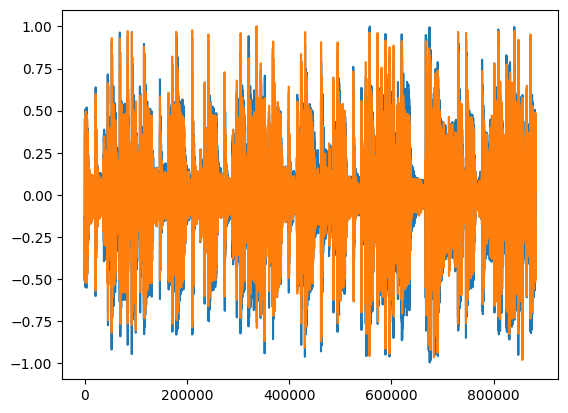

In [2]:
rate, file = read("Protection.wav")

fixed_data0 = file[:, 0]
fixed_data1 = file[:, 1]
data0 = fixed_data0.astype(np.float32, order='C') / 32767.0
data1 = fixed_data1.astype(np.float32, order='C') / 32767.0

start = 10
end = 30
data0 = data0[start * rate : end * rate]
data1 = data1[start * rate : end * rate]

plt.plot(data0)
plt.plot(data1)
plt.show()

In [3]:
Pan_L = 0.5
Pan_R = 0.5

C = np.zeros(data0.size)
S = np.zeros(data0.size)
FLOOR = sys.float_info.min

for index, data in enumerate(zip(data0, data1)):
    L = data[0]
    R = data[1]
    
    VCA_L = Pan_L * L
    VCA_R = Pan_R * R
    
    C[index] = VCA_L + VCA_R
    S[index] = VCA_L - VCA_R
    
    FWR_L = np.abs(VCA_L)
    FWR_R = np.abs(VCA_R)
     
    E = FWR_L + FWR_R + FLOOR
    Pan_L = FWR_R / E
    Pan_R = 1 - Pan_L

In [4]:
write("C.wav", rate, (C * 32767.0).astype(np.int16))
write("S.wav", rate, (S * 32767.0).astype(np.int16))
IPython.display.display(IPython.display.Audio("C.wav", rate=rate))
IPython.display.display(IPython.display.Audio("S.wav", rate=rate))